# Penguins Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('penguins')
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Valors i unitat 
- bill length: Longitud del vec en milímetres.
- bill depth: Profunditat del vec en milímetres.
- flipper length: Longitud de la aleta en milímetres.
- body mass: Masa corporal en grams.

### Valors NaN

In [3]:
# Observem a quines columnes hi ha valors nan
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
# Els atributs (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g), podem provar de substituir per: moda o mitjana

# En cas els podem eliminar, perque són tots nan i illes diferents, però sería algo així:

# Creem un nou dataframe per cada opció: 
df_with_mode = df.copy()
df_with_mean = df.copy()

# moda
bill_length_mode = df.bill_length_mm.mode()
bill_depth_mode = df.bill_depth_mm.mode()
flipper_length_mode = df.flipper_length_mm.mode()
body_mass_mode = df.body_mass_g.mode()

df_with_mode['bill_length_mm'] = df_with_mode['bill_length_mm'].fillna(bill_length_mode)
# ....

# Per la mitjana algo similar

bill_length_mean = df.bill_length_mm.mean()

In [5]:
# Borrem els dos registres que són nan:
# Buscar els seus index: 
nan_files = df[df['bill_length_mm'].isna()]
nan_files

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [6]:
# Eliminar-los: 
indexos_nans = df[df['bill_length_mm'].isna()].index
df.drop(indexos_nans, inplace=True)

# Ara nomès tenim nans al genere. (veiem com se'n han borrat 2 del genere també, abans n'hi havia 11 i ara 9)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

### Mètode describe

In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Mostrar scatter plot

In [8]:
# Mostrem un scatter plot

# Creem una columna src amb la factorització de les especies, per poder mostrar el color correctament.

In [9]:
df['spc'] = df.species.factorize()[0]

In [10]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,spc
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


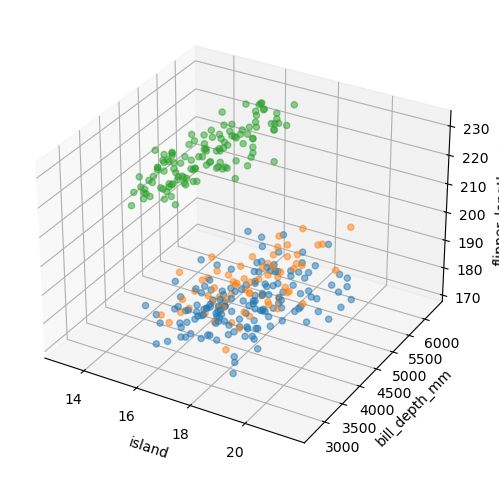

In [11]:
fig = plt.figure(figsize = (6, 6))
axs = fig.add_subplot(projection = '3d')
cmap = ListedColormap(sns.color_palette().as_hex()[:3])
  
s3d = axs.scatter(df.bill_depth_mm, df.body_mass_g, df.flipper_length_mm , c = df.spc, cmap = cmap, marker = 'o', s = 20, alpha = 0.5)
axs.set_xlabel(df.columns[1])
axs.set_ylabel(df.columns[3])
axs.set_zlabel(df.columns[4]);

In [12]:
# També ho podríem fer per representar com es distribueixen en funció de les illes:

In [13]:
df['spc_island'] = df.island.factorize()[0]

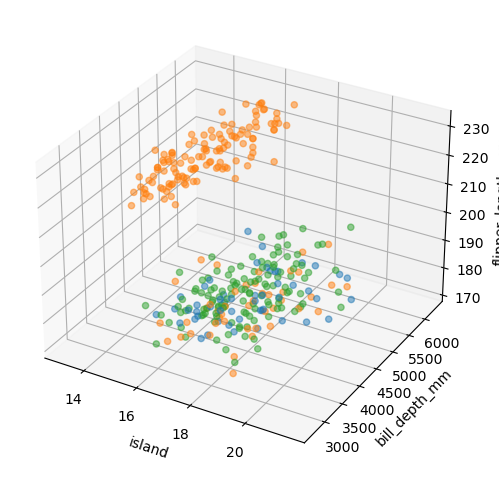

In [14]:
fig = plt.figure(figsize = (6, 6))
axs = fig.add_subplot(projection = '3d')
cmap = ListedColormap(sns.color_palette().as_hex()[:3])
  
s3d = axs.scatter(df.bill_depth_mm, df.body_mass_g, df.flipper_length_mm , c = df.spc_island, cmap = cmap, marker = 'o', s = 20, alpha = 0.5)
axs.set_xlabel(df.columns[1])
axs.set_ylabel(df.columns[3])
axs.set_zlabel(df.columns[4]);

### Tractament NaN del genere

In [15]:
# Els que no tenen genere, els hi assignem el del seu veí més proper

# Convertim el genere a valors enters per poder processar-ho amb numpy

df.sex.factorize()

(array([ 0,  1,  1,  1,  0,  1,  0, -1, -1, -1, -1,  1,  0,  0,  1,  1,  0,
         1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,
         0,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0, -1,  1,  0,  1,  0,
         1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
         0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
         0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
         0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
         1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
         0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,
         0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,
         0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,
         1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,
         0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,
         1, 

In [16]:
# Els -1 són els nans
df['sex'] = df.sex.factorize()[0]
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,spc,spc_island
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0,0


In [17]:
# Fem un dataframe nomès amb els valors que hem de tractar
df_aux = df[df['sex'] == -1] 
df_aux

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,spc,spc_island
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,-1,0,0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,-1,0,0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,-1,0,0
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,-1,0,0
47,Adelie,Dream,37.5,18.9,179.0,2975.0,-1,0,2
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,-1,2,1
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,-1,2,1
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,-1,2,1
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,-1,2,1


In [18]:
# Procedirem a borrar els registres que tenen sexe nan del original, per procesar-los i després tornar-los a ajuntar:
df.drop(df[df['sex'] == -1].index, inplace=True)

# Veiem com no tenim registres amb el -1 al dataframe original
df[df['sex'] == -1] 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,spc,spc_island


In [19]:
# Apliquem un Nearest Neighbor al dataframe df_aux amb les dades del df original

# Si tinguessim les dades factoritzades, podríem aprofitar-les totes, però en aquest cas no ho tenim:
df_nn = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
df_aux_nn = df_aux[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

df_nn_complete = df[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
df_aux_nn_complete = df_aux[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

In [20]:
df_nn.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1


In [21]:
df_aux_nn.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,34.1,18.1,193.0,3475.0,-1
9,42.0,20.2,190.0,4250.0,-1
10,37.8,17.1,186.0,3300.0,-1


In [22]:
# Si fos per 1 registre: 
primera_fila = df_aux_nn.iloc[0].values
primera_fila

array([ 3.410e+01,  1.810e+01,  1.930e+02,  3.475e+03, -1.000e+00])

In [23]:
# Fem una matriu amb el dataframe original: 
matriu_penguins = df_nn.values
matriu_penguins

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 0.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 0.00e+00]])

In [24]:
# Totes les distàncies del primer registre de df_aux (dataframe que no té genere)
distancies = np.sqrt(np.sum((primera_fila -matriu_penguins)**2, axis = 1).astype(float))

In [25]:
# Trobar la més propera: 
mes_propera = np.argmin(distancies)

# En trobem el seu genere: 
df.iloc[mes_propera]['sex']

0

In [26]:
# Ara hem de fer el mateix però per tots els punts del df_aux i modificar el -1 per el valor que toqui:

In [27]:
# Fem una funció amb el codi d'abans:

# Mètode que donat un array d'un registre de pinguï sense sexe i farà inferència amb les altres dades per deduir-ne el sexe.
# Concretament, agafarà el sexe del registre que tingui la distància euclidea més propera.
def genere_inferit(array):
    return df.iloc[np.argmin(np.sqrt(np.sum((array -matriu_penguins)**2, axis = 1)))]['sex']

In [28]:
for i in range(len(df_aux_nn)):
    nou_genere = genere_inferit(df_aux_nn.iloc[i].values)
    df_aux_nn_complete.iloc[i, df_aux_nn.columns.get_loc('sex')] = nou_genere

# Veiem com s'han modificat els generes dels pinguins de la df aux d'on no en sabiem les dades previament.
df_aux_nn_complete

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,0.0,3475.0,-1
9,Adelie,Torgersen,42.0,20.2,0.0,4250.0,-1
10,Adelie,Torgersen,37.8,17.1,1.0,3300.0,-1
11,Adelie,Torgersen,37.8,17.3,1.0,3700.0,-1
47,Adelie,Dream,37.5,18.9,1.0,2975.0,-1
246,Gentoo,Biscoe,44.5,14.3,0.0,4100.0,-1
286,Gentoo,Biscoe,46.2,14.4,1.0,4650.0,-1
324,Gentoo,Biscoe,47.3,13.8,1.0,4725.0,-1
336,Gentoo,Biscoe,44.5,15.7,1.0,4875.0,-1


In [29]:
# Ara els nostres registres estàn al final, els veiem així:
df_final_nn = pd.concat([df_nn_complete, df_aux_nn_complete], ignore_index=True)

# tornem a unir el df original amb el df_aux ja que ara conté els generes correctament
df_final_nn.tail(11)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1
332,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,0
333,Adelie,Torgersen,34.1,18.1,0.0,3475.0,-1
334,Adelie,Torgersen,42.0,20.2,0.0,4250.0,-1
335,Adelie,Torgersen,37.8,17.1,1.0,3300.0,-1
336,Adelie,Torgersen,37.8,17.3,1.0,3700.0,-1
337,Adelie,Dream,37.5,18.9,1.0,2975.0,-1
338,Gentoo,Biscoe,44.5,14.3,0.0,4100.0,-1
339,Gentoo,Biscoe,46.2,14.4,1.0,4650.0,-1
340,Gentoo,Biscoe,47.3,13.8,1.0,4725.0,-1


### Train test split

In [30]:
# Separar les dades amb 80%, 20% de test
X_train, X_test = train_test_split(df_final_nn, test_size = 0.2, random_state = 2873)
X_train.shape, X_test.shape

((273, 7), (69, 7))

In [31]:
X_train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
24,Adelie,Biscoe,40.5,18.9,180.0,3950.0,0
239,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,0
43,Adelie,Dream,42.3,21.2,191.0,4150.0,0
103,Adelie,Biscoe,43.2,19.0,197.0,4775.0,0
317,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,1


In [32]:
# Fer una matriu amb dades de entrenament (o dades que considerem bones)
I = X_train.iloc[:, 2:].to_numpy(dtype = 'float')

In [33]:
# Quantitat de veins als quals examinem
k = 5

In [34]:
# Agafar un registre random
# Aquí no cal tornar a fer aleatories perquè el set de test ja ho són
rndIdx = np.random.randint(0, X_test.shape[0])
rndIdx

10

In [35]:
# Agafar-lo del dataframe
X_test.iloc[rndIdx]

species              Gentoo
island               Biscoe
bill_length_mm         50.4
bill_depth_mm          15.7
flipper_length_mm     222.0
body_mass_g          5750.0
sex                       0
Name: 330, dtype: object

In [36]:
# convertir aquest registre del dataframe a un vector per comparar-lo amb la matriu
x = X_test.iloc[rndIdx, 2:].to_numpy(dtype = 'float')
x

array([  50.4,   15.7,  222. , 5750. ,    0. ])

In [37]:
# Calcular distancies:
X_train['dist2x'] = np.sqrt(np.sum((x -I)**2, axis = 1))
X_train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,dist2x
24,Adelie,Biscoe,40.5,18.9,180.0,3950.0,0,1800.519994
239,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,0,650.052190
43,Adelie,Dream,42.3,21.2,191.0,4150.0,0,1600.330235
103,Adelie,Biscoe,43.2,19.0,197.0,4775.0,0,975.352618
317,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,1,1050.105561


In [38]:
# Ordenar les distancies
X_train.sort_values(by = 'dist2x').head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,dist2x
217,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,0,50.163832
279,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,0,50.498119
215,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,0,50.641090
278,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,0,50.651456
287,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,0,50.668827


In [39]:
# Obtenri tants registres com 'k' haguem demanat
X_train.sort_values(by = 'dist2x')[:k]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,dist2x
217,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,0,50.163832
279,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,0,50.498119
215,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,0,50.641090
278,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,0,50.651456
287,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,0,50.668827


In [40]:
# Veiem quants n'hi ha de cada
X_train.sort_values(by = 'dist2x')[:k].species.value_counts().to_frame('n').reset_index()

,index,n
0,Gentoo,5


In [41]:
# Contem la majoria i donem el resultat
X_train.sort_values(by = 'dist2x')[:k].species.value_counts().to_frame('n').reset_index().iloc[0, 0]

'Gentoo'

In [42]:
# Considero que k = 5 es mala opció ja que el que en tenia més era 6 i la resta + de 20. 
# Això pot ser perquè hi ha dos especies que estàn molt juntes ()
# Per tant, provem d'afegir aquestes columnes també al dataset. 

### Posem les dades de species i island al moment de fer inferència

In [43]:
df_final_nn.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1


In [44]:
species_dummies = pd.get_dummies(df_final_nn.species)
island_dummies = pd.get_dummies(df_final_nn.island)

In [45]:
df_new = pd.concat((df_final_nn, species_dummies, island_dummies), axis = 1)
df_new.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,1,0,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,1,0,0,0,0,1


In [46]:
X_train, X_test = train_test_split(df_new, test_size = 0.2, random_state = 2873)
X_train.shape, X_test.shape

((273, 13), (69, 13))

In [47]:
I = X_train.iloc[:, 2:].to_numpy(dtype = 'float')
I

array([[ 40.5,  18.9, 180. , ...,   1. ,   0. ,   0. ],
       [ 46.1,  15.1, 215. , ...,   1. ,   0. ,   0. ],
       [ 42.3,  21.2, 191. , ...,   0. ,   1. ,   0. ],
       ...,
       [ 37.5,  18.9,   1. , ...,   0. ,   1. ,   0. ],
       [ 52.2,  17.1, 228. , ...,   1. ,   0. ,   0. ],
       [ 49.1,  14.5, 212. , ...,   1. ,   0. ,   0. ]])

In [48]:
# agafar numero random
rndIdx = np.random.randint(0, X_test.shape[0])
print(X_test.iloc[rndIdx])
# agafar el vector d'aquest punt
x = X_test.iloc[rndIdx, 2:].to_numpy(dtype = 'float')
# compute distances
X_train['dist2x'] = np.sqrt(np.sum((x -I)**2, axis = 1))
# sort distances, get the k nearest neighbors and class counts
X_train.sort_values(by = 'dist2x')[:k].species.value_counts().to_frame('n').reset_index()

species                 Adelie
island               Torgersen
bill_length_mm            36.7
bill_depth_mm             18.8
flipper_length_mm        187.0
body_mass_g             3800.0
sex                          1
Adelie                       1
Chinstrap                    0
Gentoo                       0
Biscoe                       0
Dream                        0
Torgersen                    1
Name: 76, dtype: object


,index,n
0,Adelie,5


### Provem de comparar els dos models

- Un sense posar island i species com a variables i l'altre sí.
- Provar d'executar per el mateix registre els dos models i fer-ho per molts registres.

In [49]:
# Partim d'aquest dataframe: 
df_new.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,1,0,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,1,0,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,1,0,0,0,0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,1,0,0,0,0,1
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,1,0,0,0,0,1


In [50]:
X_train, X_test = train_test_split(df_new, test_size = 0.2, random_state = 2873)
X_train.shape, X_test.shape

X_train.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
24,Adelie,Biscoe,40.5,18.9,180.0,3950.0,0,1,0,0,1,0,0
239,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,0,0,0,1,1,0,0
43,Adelie,Dream,42.3,21.2,191.0,4150.0,0,1,0,0,0,1,0


In [51]:
X_test.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
136,Adelie,Dream,32.1,15.5,188.0,3050.0,1,1,0,0,0,1,0
46,Adelie,Biscoe,35.0,17.9,190.0,3450.0,1,1,0,0,1,0,0
242,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,0,0,0,1,1,0,0


In [52]:
# Crear matriu amb les dades de entrenament:
I_no_var_categoriques = X_train.iloc[:, 2:-6].to_numpy(dtype = 'float')
I_si_var_categoriques = X_train.iloc[:, 2:].to_numpy(dtype = 'float')

# Fem la comparació entre si hi han les variables categoriques o no: 
x_no_vars = X_test.iloc[i, 2:-6].to_numpy(dtype = 'float')
x_si_vars = X_test.iloc[i, 2:].to_numpy(dtype = 'float')

# Creem un nou dataframe per guardar els resultats: 
df_result = pd.DataFrame(columns = ['real', 'predict_no_vars', 'predict_si_vars'])

# Guardem el dataframe original per poder copiar-lo en cada iteració del bucle:
X_train_original = X_train.copy()

# Iterem per tots els valors de test:
for i in range(X_test.shape[0]):
    X_train_aux = X_train_original.copy()
    
    X_train_aux['dist_no_vars'] = np.sqrt(np.sum((x_no_vars -I_no_var_categoriques)**2, axis = 1))
    X_train_aux['dist_si_vars'] = np.sqrt(np.sum((x_si_vars -I_si_var_categoriques)**2, axis = 1))
        
    resultat_real = X_train_aux.iloc[i][0]
        
    result_no_vars = X_train_aux.sort_values(by = 'dist_no_vars')[:k].species.value_counts().index[0]
    result_si_vars = X_train_aux.sort_values(by = 'dist_si_vars')[:k].species.value_counts().index[0]
    
    
    df_aux = pd.DataFrame({'real': [resultat_real],'predict_no_vars': [result_no_vars], 'predict_si_vars':[result_si_vars]})
    df_result = pd.concat((df_result, df_aux), axis = 0)

df_result.reset_index(drop=True, inplace=True)

# Sembla que no acaba d'estar bé, perquè les dades no tenen coherència. Surten els mateixos valors i molt poc encert.
df_result.head(3)

,real,predict_no_vars,predict_si_vars
0,Adelie,Gentoo,Gentoo
1,Gentoo,Gentoo,Gentoo
2,Adelie,Gentoo,Gentoo


In [53]:
total = X_test.shape[0]

percentatge_acert_sense_variables_categoriques = (df_result['real'] == df_result['predict_no_vars']).sum() / total * 100
percentatge_acert_amb_variables_categoriques = (df_result['real'] == df_result['predict_si_vars']).sum() / total * 100

In [54]:
print(f"Encerts sense variables cat: {percentatge_acert_sense_variables_categoriques}%")
print(f"Encerts amb variables cat: {percentatge_acert_amb_variables_categoriques}%")

Encerts sense variables cat: 37.68115942028986%
Encerts amb variables cat: 37.68115942028986%
